# Coursework 9

### Import required Python libraries



In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Activation
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam

### Import and shape the dataset (Fashion Mnist)

In [0]:
print('* Importing and shaping the data *')
print()

mnist = tf.keras.datasets.fashion_mnist  # load mnist dataset from tensorflow
(input_train, output_train_class), (input_test, output_test_class) = mnist.load_data()

print('input_train (original): ', input_train.shape)
print('input_test (original): ', input_test.shape)
print()

input_train= input_train.reshape(input_train.shape[0], 28, 28, 1)  # add an extra dimension to array
input_test= input_test.reshape(input_test.shape[0], 28, 28, 1)

input_train = input_train / 255.0  # max normalise the image data[0:1]
input_test = input_test / 255.0

output_train_class_onehot = tf.keras.utils.to_categorical(output_train_class, 10)  # create one-hot encoded class
output_test_class_onehot = tf.keras.utils.to_categorical(output_test_class, 10)

output_class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']    # class names string

print('input_train : ', input_train.shape)
print('output_train_class : ', output_train_class.shape)
print('output_train_class_onehot : ', output_train_class_onehot.shape)
print()
print('input_test : ', input_test.shape)
print('output_test_class : ', output_test_class.shape)
print('output_test_class_onehot : ', output_test_class_onehot.shape)
print()
print('output_class_names : ', output_class_names)
print()

item_id = 5

print('item_id : ', item_id)
print('output_train_class [item_id] : ', output_train_class[item_id])
print('output_train_class_onehot [item_id] : ', output_train_class_onehot[item_id, :])

plt.imshow(input_train[item_id, :, :, 0], cmap=plt.cm.binary)
plt.title('input_train [' + str(item_id) + ']')
plt.grid(None)
plt.xticks([])
plt.yticks([])
plt.show()

## Define network

In [0]:
# function to training model
def network(
    input_train = input_train, 
    output_train_class_onehot = output_train_class_onehot,
    optimizer_type = Adam(lr=0.001),
    loss = 'categorical_crossentropy',
    metrics = ['categorical_accuracy'],
    dropout_ratio = 0.0,
    validtrain_split_ratio = 0.1,
    max_epochs = 20,
    batch_size = 1000,
    batch_shuffle = True,
    input_shape = (28, 28, 1),
    nlayer = 0,
    activation = 'sigmoid',
    batch_norm = False):

    inputs = Input(shape=input_shape)
    dense = Flatten() (inputs)

    for i in range(nlayer):
        dense = Dense(500) (dense)
        dense = Activation(activation) (dense)
        if(batch_norm==True):
            dense=BatchNormalization() (dense)
    dense = Dense(128) (dense)
    dense = Activation(activation) (dense)
    if(batch_norm==True):
        dense=BatchNormalization() (dense)
    
    dense = Dense(64) (dense)
    dense = Activation(activation) (dense)
    if(batch_norm==True):
        dense=BatchNormalization() (dense)

    dense = Dense(32) (dense)
    dense = Activation(activation) (dense)
    if(batch_norm==True):
        dense=BatchNormalization() (dense)

    outputs = Dense(10, activation='softmax') (dense)

    # compile the network
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=optimizer_type, loss=loss, metrics=metrics)

    print('* Training the compiled network *')
    print()

    history = model.fit(input_train, output_train_class_onehot, \
                        batch_size=batch_size, \
                        epochs=max_epochs, \
                        validation_split=validtrain_split_ratio, \
                        shuffle=batch_shuffle)
    print()
    print('Training completed')
    print()

    return model, history


In [0]:
# function to plot numlayers vs accuracy
def plot_result(layers, accuracy):
    fig, ax = plt.subplots()
    # model loss
    ax.plot(layers, accuracy)
    ax.set_title('num_layers vs accuracy')
    ax.set_xlabel('num_layers')
    ax.set_ylabel('accuracy')
    fig.show()    

## Task 1

In [0]:
accuracy = []
layers = [0,1,2,3,4,10,15,20,25]
for n in layers:
    model, history = network(nlayer=n)
    evaluate_model = model.evaluate(x=input_test, y=output_test_class_onehot)
    accuracy.append(evaluate_model[1])

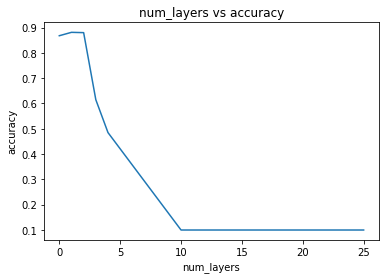

In [41]:
plot_result(layers, accuracy)

## Task 2

In [24]:
accuracy = []
layers = [0,1,2,3,4,10,15,20,25]
for n in layers:
    model, history = network(activation = 'relu',nlayer=n)
    evaluate_model = model.evaluate(x=input_test, y=output_test_class_onehot)
    accuracy.append(evaluate_model[1])

* Training the compiled network *

Epoch 1/20
54/54 [==============================] - 1s 9ms/step - loss: 0.7727 - categorical_accuracy: 0.7232 - val_loss: 0.4873 - val_categorical_accuracy: 0.8278
Epoch 2/20
54/54 [==============================] - 0s 7ms/step - loss: 0.4371 - categorical_accuracy: 0.8463 - val_loss: 0.4291 - val_categorical_accuracy: 0.8448
Epoch 3/20
54/54 [==============================] - 0s 7ms/step - loss: 0.3900 - categorical_accuracy: 0.8617 - val_loss: 0.3872 - val_categorical_accuracy: 0.8600
Epoch 4/20
54/54 [==============================] - 0s 7ms/step - loss: 0.3578 - categorical_accuracy: 0.8717 - val_loss: 0.3921 - val_categorical_accuracy: 0.8590
Epoch 5/20
54/54 [==============================] - 0s 7ms/step - loss: 0.3459 - categorical_accuracy: 0.8747 - val_loss: 0.3657 - val_categorical_accuracy: 0.8720
Epoch 6/20
54/54 [==============================] - 0s 7ms/step - loss: 0.3260 - categorical_accuracy: 0.8817 - val_loss: 0.3585 - val_categorica

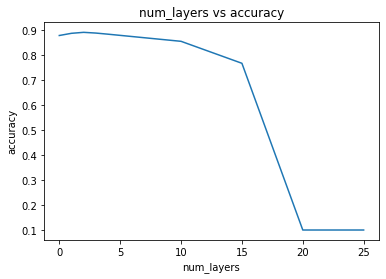

In [29]:
plot_result(layers, accuracy)

## Task 3

In [34]:
accuracy3 = []
layers = [0,1,2,3,4,10,15,20,25]
for n in layers:
    model, history = network(activation = 'relu',nlayer=n,batch_norm = True)
    evaluate_model = model.evaluate(x=input_test, y=output_test_class_onehot)
    accuracy3.append(evaluate_model[1])

* Training the compiled network *

Epoch 1/20
54/54 [==============================] - 1s 12ms/step - loss: 0.6081 - categorical_accuracy: 0.7928 - val_loss: 0.6373 - val_categorical_accuracy: 0.7830
Epoch 2/20
54/54 [==============================] - 0s 9ms/step - loss: 0.3703 - categorical_accuracy: 0.8658 - val_loss: 0.4515 - val_categorical_accuracy: 0.8413
Epoch 3/20
54/54 [==============================] - 0s 9ms/step - loss: 0.3303 - categorical_accuracy: 0.8799 - val_loss: 0.3906 - val_categorical_accuracy: 0.8673
Epoch 4/20
54/54 [==============================] - 1s 9ms/step - loss: 0.3081 - categorical_accuracy: 0.8871 - val_loss: 0.4145 - val_categorical_accuracy: 0.8450
Epoch 5/20
54/54 [==============================] - 0s 9ms/step - loss: 0.2883 - categorical_accuracy: 0.8935 - val_loss: 0.3617 - val_categorical_accuracy: 0.8690
Epoch 6/20
54/54 [==============================] - 0s 9ms/step - loss: 0.2752 - categorical_accuracy: 0.8985 - val_loss: 0.3348 - val_categoric

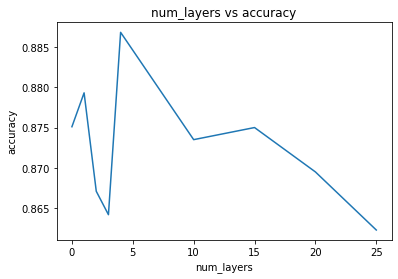

In [35]:
plot_result(layers, accuracy3)

## Task 4

a. The sigmoid function converts a input into a space between 0 and 1. So, a large change in the input of the sigmoid function will cause a small change in the output and the derivative becomes small. Thus, when there are many layer in the network, it can cause the gradient to be too small for training to work effectively and drop accuracy.

b. With relu activation function, positive signal sent to latter layer is identical to the output from the previous layer(f(x)=x if x>0 ), which means ReLU does not cause a small derivative. So, compared with the case with sigmoid, signals is less likely to vanish after it is sent through many layers.

c. With batch normalization, output signal(input signal to the latter layer) is mapped to normalized space and a problem with a small derivative is prevented. So, even if we have many hidden layers, with batch normalization, we can keep high accuracy.
